In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [3]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
path_to_test = path.join(path.abspath('..'), 'data', 'test.csv')

In [4]:
train = pd.read_csv(path_to_train)
test = pd.read_csv(path_to_test)

In [5]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [8]:
print(f"P(target=1) = {train['target'].sum() / len(train):.3f}")

In [37]:
for col in train.columns:
    print(f'{col}: {train[col].nunique()}')

id: 600000
bin_0: 2
bin_1: 2
bin_2: 2
bin_3: 2
bin_4: 2
nom_0: 3
nom_1: 6
nom_2: 6
nom_3: 6
nom_4: 4
nom_5: 1220
nom_6: 1519
nom_7: 222
nom_8: 222
nom_9: 2218
ord_0: 3
ord_1: 6
ord_2: 6
ord_3: 15
ord_4: 26
ord_5: 190
day: 8
month: 13
target: 2


In [45]:
def plot_feature(feature, marker=None, sort=False):
    fig, ax = plt.subplots(1, 3, figsize=(17,4))
    if sort:
        train.groupby(feature)['target'].mean().sort_values().plot(ax=ax[0], marker=marker)
    else:
        train.groupby(feature)['target'].mean().plot(ax=ax[0], marker=marker)
    train.groupby(feature)['target'].count().plot(ax=ax[1], marker=marker)
    test.groupby(feature)['day'].count().plot(ax=ax[2], marker=marker)
    ax[0].set_title('mean')
    ax[1].set_title('train count')
    ax[2].set_title('test count')
    return ax
    
def fillna(train, test, features, values):
    for i, feature in enumerate(features):
        train[feature] = train[feature].fillna(value=values[i])
        test[feature] = test[feature].fillna(value=values[i])
    return train, test

In [25]:
train, test = fillna(train, test, ['day', 'month', 'ord_1'], [-1, -1, 'NAN'])

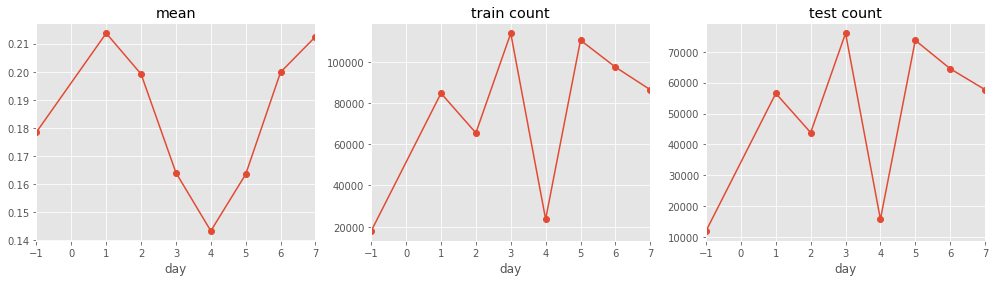

In [26]:
ax = plot_feature('day', marker='o');

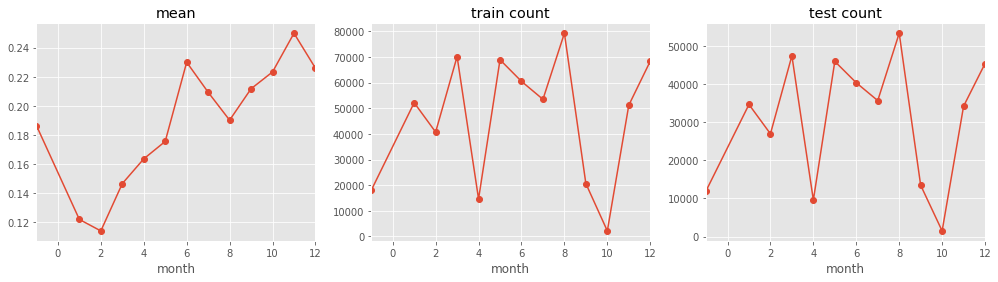

In [27]:
ax = plot_feature('month', marker='o');

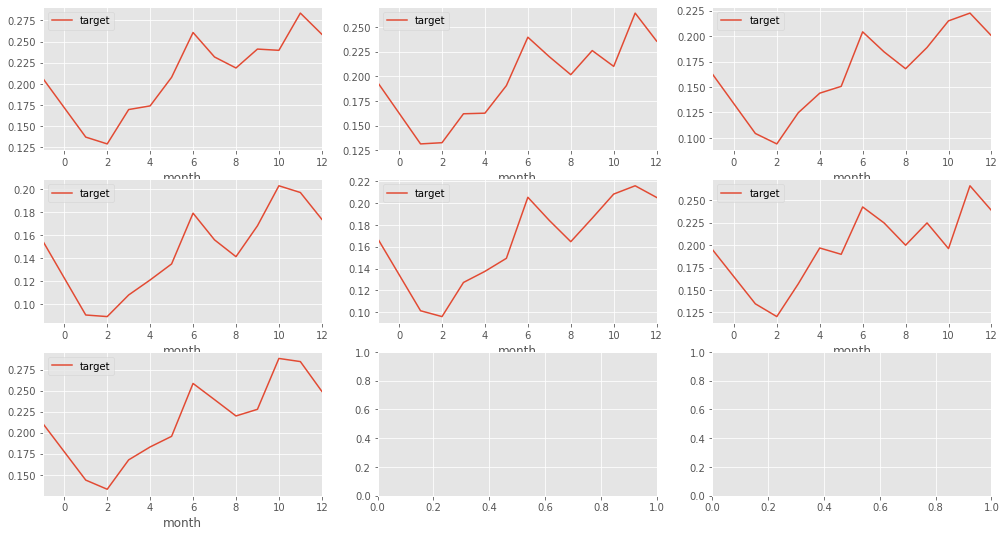

In [63]:
fig, ax = plt.subplots(3,3,figsize=(17,9))
train.loc[train['day']==1, ['month', 'target']].groupby('month').mean().plot(ax=ax[0,0])
train.loc[train['day']==2, ['month', 'target']].groupby('month').mean().plot(ax=ax[0,1])
train.loc[train['day']==3, ['month', 'target']].groupby('month').mean().plot(ax=ax[0,2])
train.loc[train['day']==4, ['month', 'target']].groupby('month').mean().plot(ax=ax[1,0])
train.loc[train['day']==5, ['month', 'target']].groupby('month').mean().plot(ax=ax[1,1])
train.loc[train['day']==6, ['month', 'target']].groupby('month').mean().plot(ax=ax[1,2])
train.loc[train['day']==7, ['month', 'target']].groupby('month').mean().plot(ax=ax[2,0]);

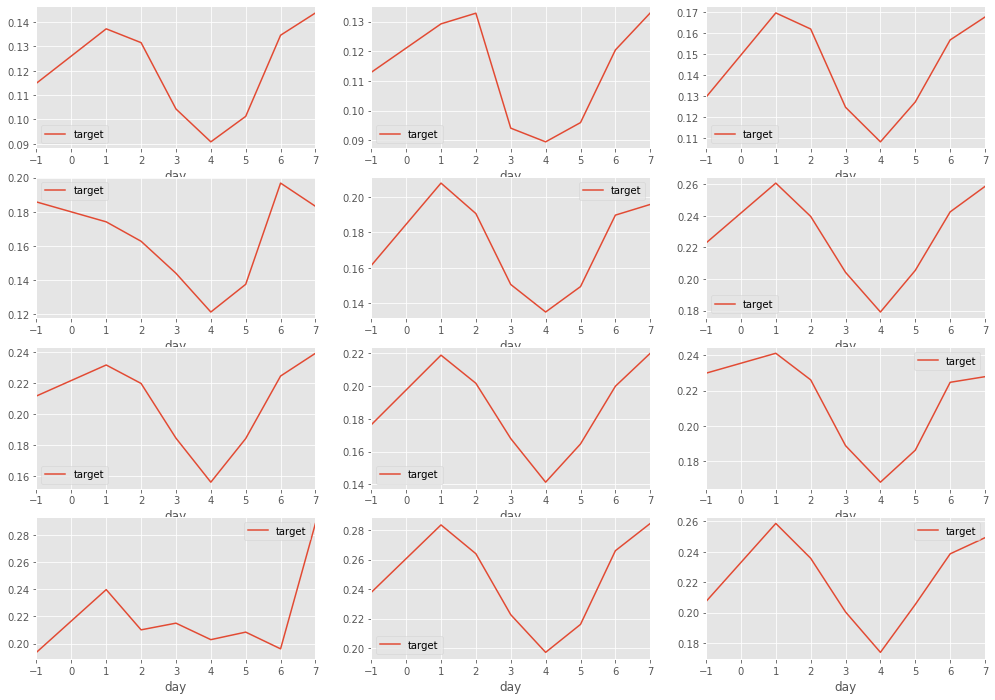

In [75]:
fig, ax = plt.subplots(4,3,figsize=(17,12))
train.loc[train['month']==1, ['day', 'target']].groupby('day').mean().plot(ax=ax[0,0])
train.loc[train['month']==2, ['day', 'target']].groupby('day').mean().plot(ax=ax[0,1])
train.loc[train['month']==3, ['day', 'target']].groupby('day').mean().plot(ax=ax[0,2])
train.loc[train['month']==4, ['day', 'target']].groupby('day').mean().plot(ax=ax[1,0])
train.loc[train['month']==5, ['day', 'target']].groupby('day').mean().plot(ax=ax[1,1])
train.loc[train['month']==6, ['day', 'target']].groupby('day').mean().plot(ax=ax[1,2])
train.loc[train['month']==7, ['day', 'target']].groupby('day').mean().plot(ax=ax[2,0]);
train.loc[train['month']==8, ['day', 'target']].groupby('day').mean().plot(ax=ax[2,1]);
train.loc[train['month']==9, ['day', 'target']].groupby('day').mean().plot(ax=ax[2,2]);
train.loc[train['month']==10, ['day', 'target']].groupby('day').mean().plot(ax=ax[3,0]);
train.loc[train['month']==11, ['day', 'target']].groupby('day').mean().plot(ax=ax[3,1]);
train.loc[train['month']==12, ['day', 'target']].groupby('day').mean().plot(ax=ax[3,2]);

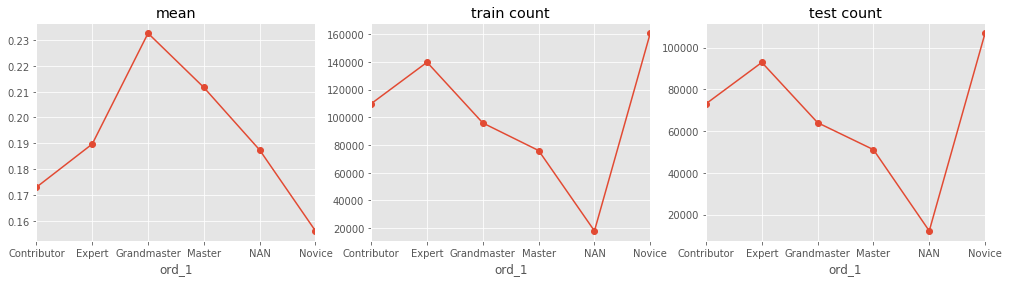

In [28]:
ax = plot_feature('ord_1', marker='o');

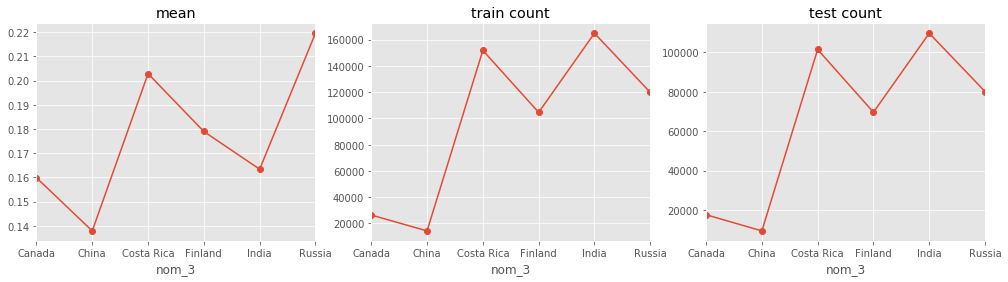

In [29]:
ax = plot_feature('nom_3', marker='o');

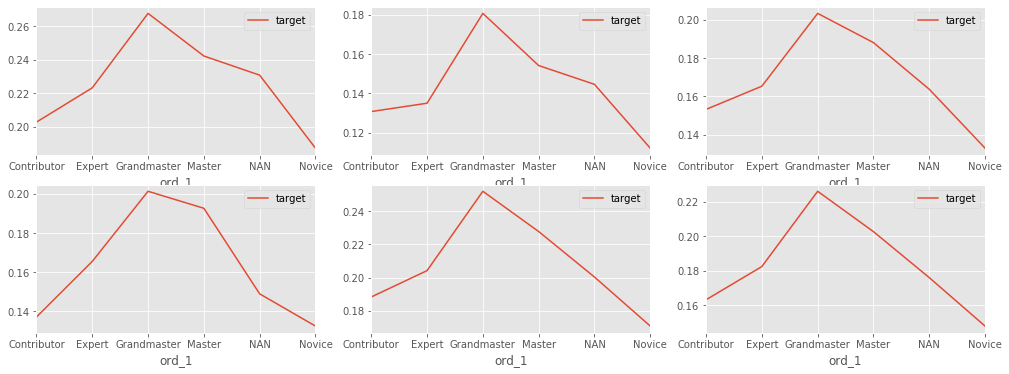

In [35]:
fig, ax = plt.subplots(2,3,figsize=(17,6))
train.loc[train['nom_3']=='Russia', ['ord_1', 'target']].groupby('ord_1').mean().plot(ax=ax[0,0])
train.loc[train['nom_3']=='China', ['ord_1', 'target']].groupby('ord_1').mean().plot(ax=ax[0,1])
train.loc[train['nom_3']=='India', ['ord_1', 'target']].groupby('ord_1').mean().plot(ax=ax[0,2])
train.loc[train['nom_3']=='Canada', ['ord_1', 'target']].groupby('ord_1').mean().plot(ax=ax[1,0])
train.loc[train['nom_3']=='Costa Rica', ['ord_1', 'target']].groupby('ord_1').mean().plot(ax=ax[1,1])
train.loc[train['nom_3']=='Finland', ['ord_1', 'target']].groupby('ord_1').mean().plot(ax=ax[1,2]);

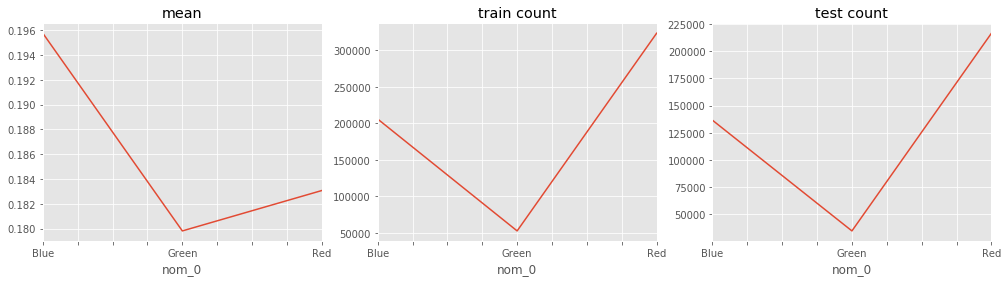

In [34]:
plot_feature('nom_0');

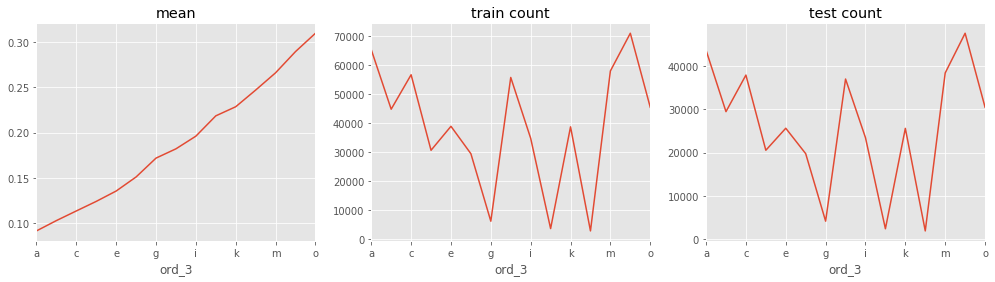

In [39]:
plot_feature('ord_3');

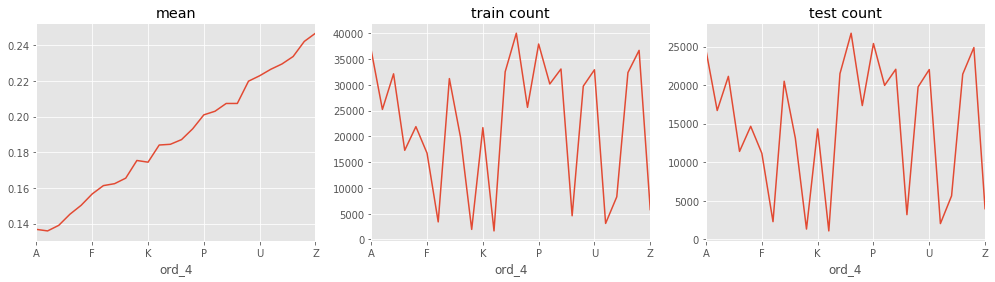

In [40]:
plot_feature('ord_4');

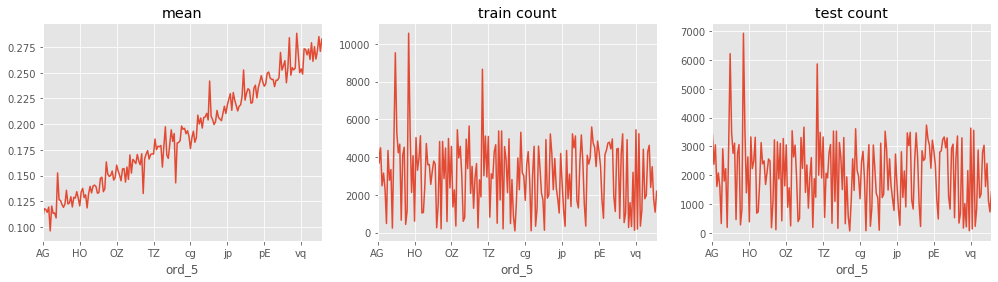

In [41]:
plot_feature('ord_5');

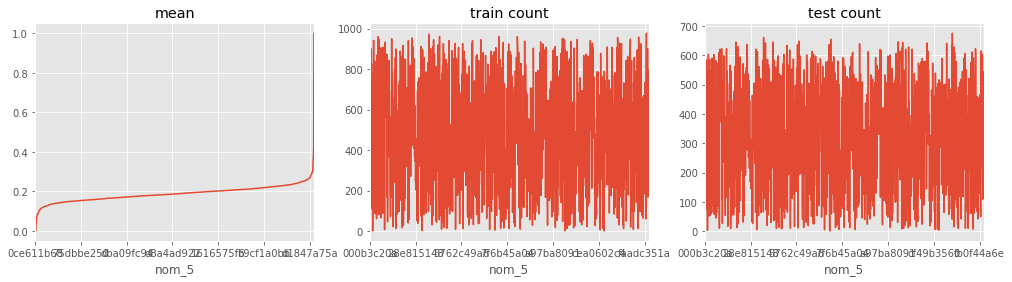

In [46]:
plot_feature('nom_5', sort=True);

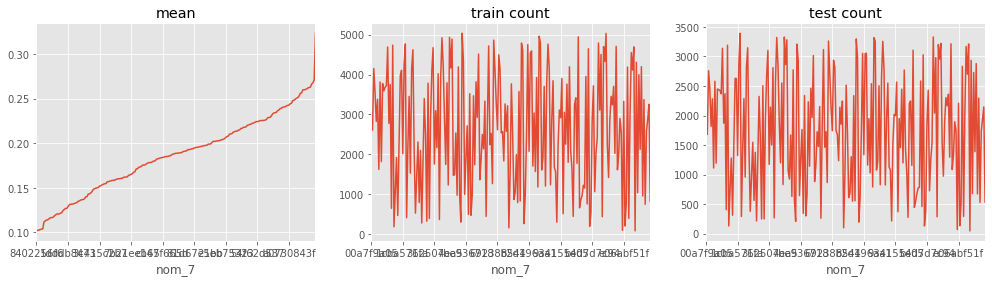

In [47]:
plot_feature('nom_7', sort=True);

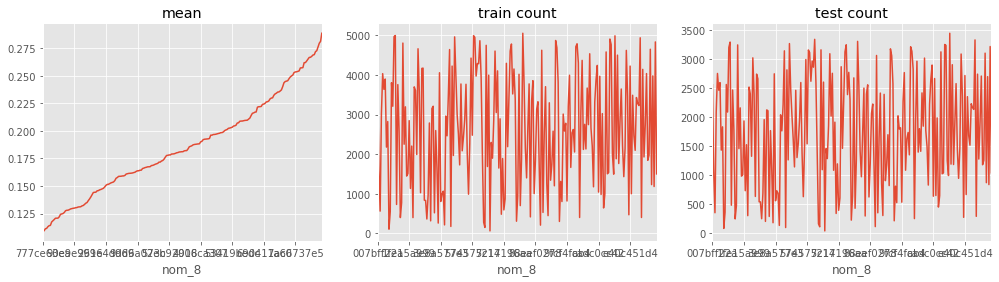

In [48]:
plot_feature('nom_8', sort=True);

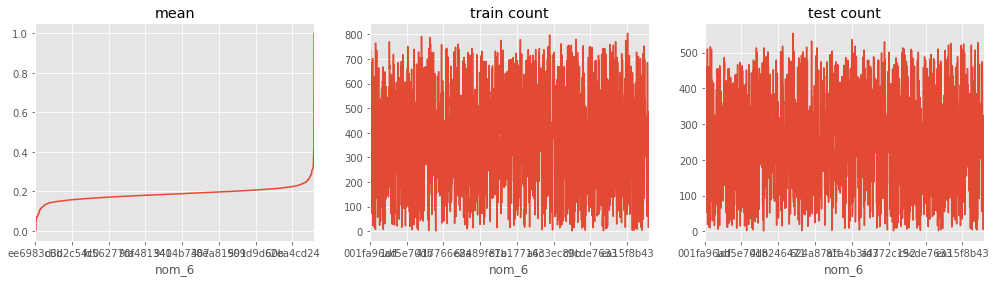

In [49]:
plot_feature('nom_6', sort=True);

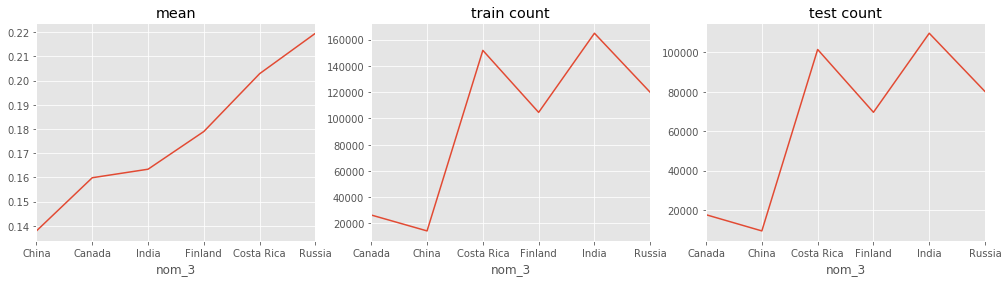

In [52]:
plot_feature('nom_3', sort=True);

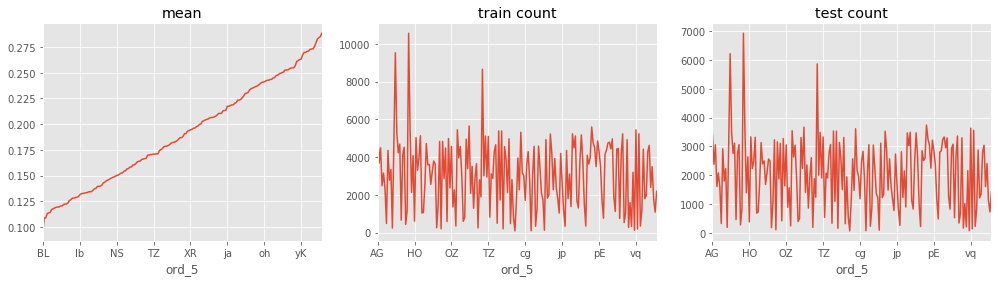

In [51]:
plot_feature('ord_5', sort=True);